In [2]:
%load_ext lab_black

No handles with labels found to put in legend.


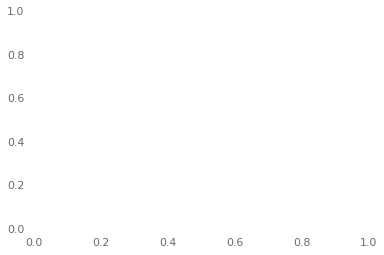

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from viz_defaults import *

In [ ]:
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=color_list)

In [ ]:
def plot_loss(curves, title="", tag=None):
    if tag == None:
        tag = title
    for path, label in curves:
        data = pd.read_json(path, lines=True)
        plt.plot(data.epoch, data.train_loss, label=label)
    plt.legend()
    plt.title(title)
    plt.xlabel("epoch")
    plt.ylabel("pretraining loss")
    plt.tight_layout()
    plt.savefig(
        f"plots/pretraining_loss_{tag.replace(' ', '_').replace('=', '_').replace('/', '_')}.pdf"
    )

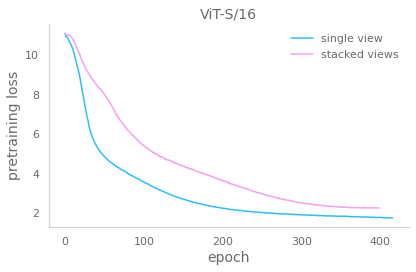

In [ ]:
plot_loss(
    [
        ("pretraining_runs/vit_small_p16/log.txt", "single view"),
        ("pretraining_runs/stacked_views/vit_small_p16/log.txt", "stacked views"),
    ],
    "ViT-S/16",
)

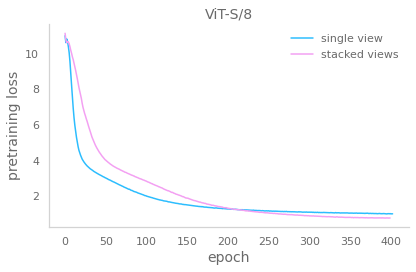

In [ ]:
plot_loss(
    [
        ("pretraining_runs/vit_small_p8/log.txt", "single view"),
        ("pretraining_runs/stacked_views/vit_small_p8/log.txt", "stacked views"),
    ],
    "ViT-S/8",
)

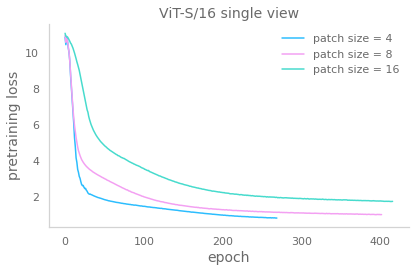

In [ ]:
plot_loss(
    [
        (
            "pretraining_runs/vit_small_p4/log.txt",
            "patch size = 4",
        ),
        (
            "pretraining_runs/vit_small_p8/log.txt",
            "patch size = 8",
        ),
        (
            "pretraining_runs/vit_small_p16/log.txt",
            "patch size = 16",
        ),
    ],
    "ViT-S/16 single view",
    tag="pretraining_loss_by_patch_size",
)

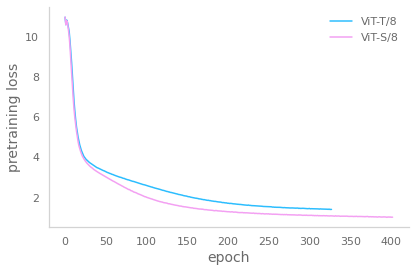

In [ ]:
plot_loss(
    [
        (
            "pretraining_runs/vit_tiny_p8/log.txt",
            "ViT-T/8",
        ),
        (
            "pretraining_runs/vit_small_p8/log.txt",
            "ViT-S/8",
        ),
    ],
    "",
)

In [ ]:
import torch

In [3]:
results = pd.DataFrame(torch.load("ft_runs/stacked_views/vit_small_p8/results.pth.tar"))
results.to_pickle("ft_runs/stacked_views/vit_small_p8/results.pkl")

NameError: name 'pd' is not defined

In [4]:
results[pd.isnull(results.fold)].c_index.iloc[0]

NameError: name 'results' is not defined

In [26]:
results.c_index.mean(), results.c_index.std()

(0.5724790298504674, 0.02762083467602005)

In [39]:
results = pd.read_pickle("ft_runs/single_view/vit_small_p4/results.pkl")

UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

In [43]:
bmmr2_training = pd.read_csv("bmmr2_training_set_clinical.csv")

In [44]:
len(bmmr2_training)

117

In [45]:
bmmr2_testing = pd.read_csv("bmmr2_testing_set_clinical.csv")

In [46]:
len(bmmr2_testing)

74

In [47]:
full_clinical_data = pd.read_excel("full_ispy2_data.xlsx")

In [49]:
full_clinical_data[~pd.isnull(full_clinical_data.pcr)]

,I-SPY 2 Research ID,TCIA PATIENT ID,T0,T1,T2,T3,BMMR2_TRAIN,BMMR2_TEST,PRIMARY_AIM_T0,PRIMARY_AIM_T1,...,QC_ROI_CONFIDENCE_T3,analysis cohort,eligigible,age,race,Ltype,hrher4g,SBRgrade,MRLD,pcr
2,107700,ACRIN-6698-107700,1,1,1,0,1,0,1,1,...,NaN,1,1,68.0,Asian,Multiple masses,HR + / HER2 +,III (High),2.3,Non-pCR
3,373346,ACRIN-6698-373346,1,1,1,1,1,0,1,1,...,MODERATE,1,1,59.0,White,Multiple NME,HR + / HER2 -,III (High),4.1,Non-pCR
5,641977,ACRIN-6698-641977,1,1,1,1,0,1,1,1,...,MODERATE,1,1,57.0,Native Hawaiian or other Pacific Islander,Single mass,HR + / HER2 -,III (High),3.2,Non-pCR
6,326433,ACRIN-6698-326433,1,1,1,1,0,1,1,1,...,MODERATE,1,1,39.0,White,Single mass,HR - / HER2 - (TN),III (High),2.7,pCR
8,547405,ACRIN-6698-547405,1,1,1,0,0,0,1,1,...,NaN,1,1,25.0,Black,Single mass,HR - / HER2 - (TN),III (High),5.4,Non-pCR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,962153,ACRIN-6698-962153,1,1,1,1,0,1,1,1,...,NaN,1,1,55.0,White,Single NME,HR + / HER2 +,III (High),9.1,Non-pCR
380,711476,ACRIN-6698-711476,1,1,1,1,1,0,1,1,...,MODERATE,1,1,47.0,White,Multiple masses,HR + / HER2 -,II (Intermediate),2.1,pCR
381,361701,ACRIN-6698-361701,1,1,1,1,1,0,1,1,...,HIGH,1,1,49.0,White,Multiple masses,HR + / HER2 -,II (Intermediate),2.4,Non-pCR
382,924071,ACRIN-6698-924071,1,1,1,1,0,0,1,0,...,MODERATE,1,1,57.0,White,Multiple masses,HR + / HER2 -,III (High),2.7,Non-pCR


In [50]:
74 + 117

191

In [51]:
bmmr2_training

,Patient ID Number,Patient ID DICOM,analy,elig,age,race,Ltype,hrher4g,SBRgrade,MRLD,pcr,Split
0,107700,ACRIN-6698-107700,1,1,68,Asian,Multiple masses,HR + / HER2 +,III (High),2.3,Non-pCR,Train
1,373346,ACRIN-6698-373346,1,1,59,White,Multiple NME,HR + / HER2 -,III (High),4.1,Non-pCR,Train
2,949444,ACRIN-6698-949444,1,1,34,Asian,Multiple masses,HR - / HER2 - (TN),III (High),3.0,Non-pCR,Train
3,220471,ACRIN-6698-220471,1,1,50,White,Multiple masses,HR - / HER2 +,III (High),3.4,Non-pCR,Train
4,220925,ACRIN-6698-220925,1,1,37,White,Multiple masses,HR - / HER2 +,III (High),7.0,Non-pCR,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
112,765671,ACRIN-6698-765671,1,1,42,Black,Multiple NME,HR - / HER2 - (TN),II (intermediate),3.8,pCR,Train
113,384830,ACRIN-6698-384830,1,1,37,White,Single mass,HR + / HER2 +,III (High),5.1,Non-pCR,Train
114,711476,ACRIN-6698-711476,1,1,47,White,Multiple masses,HR + / HER2 -,II (intermediate),2.1,pCR,Train
115,361701,ACRIN-6698-361701,1,1,49,White,Multiple masses,HR + / HER2 -,II (intermediate),2.4,Non-pCR,Train


In [52]:
path = "ft_runs/single_view/vit_small_p4/results.pkl"
results = torch.load(path)

In [53]:
results

[{'loss': 4.362698888778686, 'c_index': 0.6386746288463133, 'fold': 3},
 {'loss': 4.473228984408909, 'c_index': 0.5667357578041581, 'fold': 2},
 {'loss': 4.4636251661512585, 'c_index': 0.572866833943174, 'fold': 1},
 {'loss': 4.460675239562988, 'c_index': 0.5940518004679282, 'fold': 0},
 {'loss': 4.390494929419623, 'c_index': 0.6268461529048994, 'fold': 4},
 {'loss': 4.574914991855621, 'c_index': 0.5386811787058715, 'fold': None}]

In [54]:
results = pd.DataFrame(results)

In [55]:
results.c_index

0    0.638675
1    0.566736
2    0.572867
3    0.594052
4    0.626846
5    0.538681
Name: c_index, dtype: float64

In [ ]:
results.to_pickle(path)